In [1]:
# Problem: Predict if a loan will get approved or not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [155]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [156]:
for med in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    mediane = df[med].median()
    print('Median of %s is %f\n' %(med, mediane))

Median of ApplicantIncome is 3812.500000

Median of CoapplicantIncome is 1188.500000

Median of LoanAmount is 128.000000

Median of Loan_Amount_Term is 360.000000

Median of Credit_History is 1.000000



In [157]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

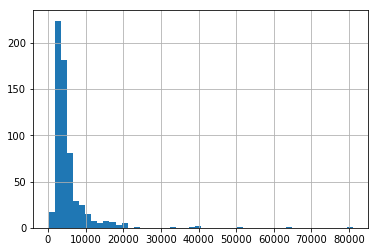

In [158]:
df['ApplicantIncome'].hist(bins=50)
plt.show()

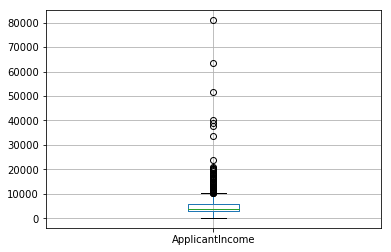

In [159]:
# we look at box plots to understand the distributions
df.boxplot(column='ApplicantIncome')
plt.show()

In [160]:
#This confirms the presence of a lot of outliers/extreme values. This can be attributed 
#to the income disparity in the society. Part of this can be driven by the fact 
#that we are looking at people with different education levels

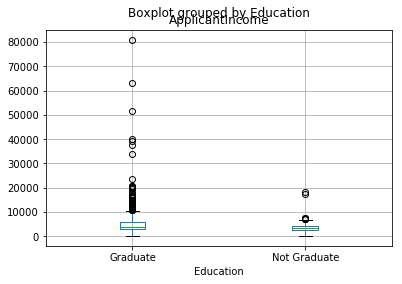

In [161]:
# Let us segregate them by Education
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

In [162]:
# We can see that there is no substantial different between the mean income of graduate and non-graduates.
# But there are a higher number of graduates with very high incomes,
# which are appearing to be the outliers

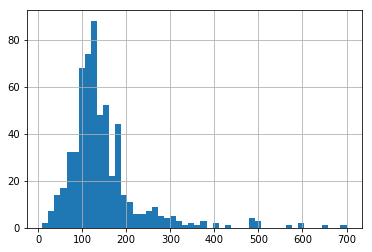

In [163]:
#  look at the histogram and boxplot of LoanAmount 
df['LoanAmount'].hist(bins=50)
plt.show()

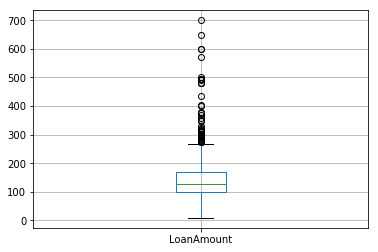

In [164]:
df.boxplot(column='LoanAmount')
plt.show()

In [165]:
# Again, there are some extreme values. Clearly, both ApplicantIncome and 
# LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values,
# while ApplicantIncome has a few extreme values, 
# which demand deeper understanding. 

In [166]:
# Check missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [167]:
# fill missing values in LoanAmount
###df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

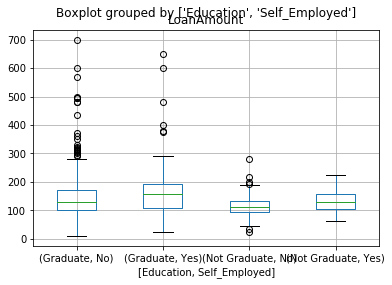

In [168]:
df.boxplot(column='LoanAmount', by =['Education','Self_Employed'])
plt.show()

In [169]:
#  we see some variations in the median of loan amount for each group and this can be used to impute the values.

In [170]:
#But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

In [171]:
# Table of frequence of Self_Employed in %
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [175]:
# Since ~86% values are “No”, it is safe to impute the missing values as “No” 
#as there is a high probability of success. 
df['Self_Employed'].fillna('No',inplace=True)

In [176]:
# define a function, which returns the values of these cells and apply it to fill the missing values of loan amount
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

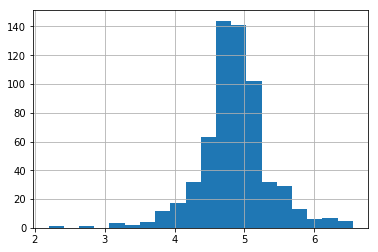

In [177]:
# analyze LoanAmount first. Since the extreme values are practically possible, 
# i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers,
# let’s try a log transformation 
# to nullify their effect
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
plt.show()

In [178]:
# Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

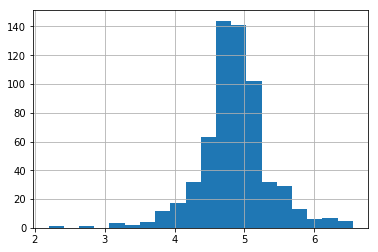

In [179]:
# Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support 
#Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation
#of the same.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 
plt.show()

In [180]:
df.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status', u'LoanAmount_log', u'TotalIncome', u'TotalIncome_log'],
      dtype='object')

In [181]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [182]:
pd.pivot_table(df,index=['Gender', 'Married', 'Dependents'], values=['LoanAmount'])

LoanAmount
Gender Married Dependents            
Female No      0           111.083333
               1           109.807692
               2           129.000000
               3+          239.333333
       Yes     0           120.800000
               1           293.666667
               2           115.000000
Male   No      0           135.174312
               1           133.700000
               2           126.833333
               3+          217.666667
       Yes     0           147.832215
               1           158.256944
               2           154.470930
               3+          163.023810

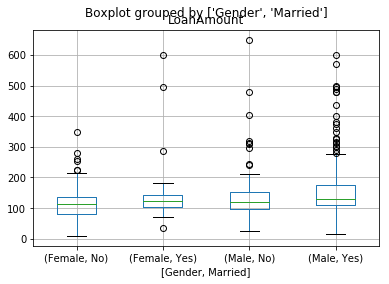

In [183]:
df.boxplot(column='LoanAmount', by =['Gender', 'Married'])
plt.show()

In [203]:
for l in ['Credit_History', 'Gender','Married', 'Loan_Amount_Term', 'LoanAmount_log']:
    df[l].fillna(df[l].mean(), inplace=True)

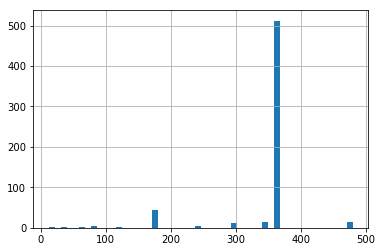

In [208]:
df['Loan_Amount_Term'].hist(bins=50)
plt.show()

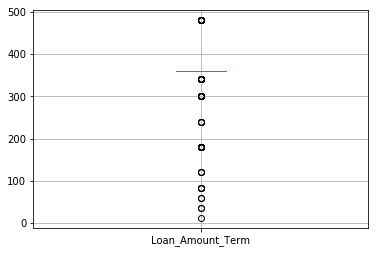

In [207]:
df.boxplot(column='Loan_Amount_Term')
plt.show()

In [ ]:
# Building a Predictive Model

In [202]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [151]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

/home/winner/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [186]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [196]:
# We can easily make some intuitive hypothesis to set the ball rolling. 
#The chances of getting a loan will be higher for:
# Applicants having a credit history (remember we observed this in exploration?)
# Applicants with higher applicant and co-applicant incomes
# Applicants with higher education level
# Properties in urban areas with high growth perspectives
# So let’s make our first model with ‘Credit_History’.

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [197]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [ ]:
#Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:
#Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
#Better modeling techniques. Let’s explore this next.

In [198]:
#Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.


In [199]:
# Decision Tree

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.270%
Cross-Validation Score : 81.110%


In [200]:
# Here the model based on categorical variables is unable to have an impact 
# because Credit History is dominating over them.

In [204]:
#Let’s try a few numerical variables
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 90.228%
Cross-Validation Score : 68.233%


In [209]:
#Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. 
#This is the result of model over-fitting the data.

In [211]:
# Let’s try an even more sophisticated algorithm and see if it helps
# Random Forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.343%


In [212]:
# Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

#Reducing the number of predictors
#Tuning the model parameters

In [213]:
# Let’s try both of these. First we see the feature importance matrix from which we’ll take 
# the most important features.
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp

Credit_History      0.277548
TotalIncome_log     0.261493
LoanAmount_log      0.210583
Dependents          0.058298
Property_Area       0.050440
Loan_Amount_Term    0.043692
Gender              0.027548
Married             0.026471
Education           0.022691
Self_Employed       0.021237
dtype: float64


In [214]:
# Let’s use the top 5 variables for creating a model. Also, we will modify the parameters 
# of random forest model a little bit

In [215]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.410%
Cross-Validation Score : 80.456%
